# News: 

I enabled a `.ipynb` viewer at https://strawlab-rp2.zoologie.uni-freiburg.de/straw/pm21-dragon.

# `exercise-04` review

## Flow control Q3

Now create a function called `simulate_generation` which takes two arguments, `a` and `Rt`. This function should return `None`. The first argument `a` will be a list with the number of infected individuals and `Rt` is the effective reproduction number, as before. The function should compute the number of newly infected individuals after one generation and append this to the list passed as the first argument.

Your function signature should look like this:

```python
    def simulate_generation(a,Rt):
```

Here is an example that works:

```python
b = [1]
simulate_generation(b,3)
simulate_generation(b,3)
simulate_generation(b,3)
b
```

In this above example, `b` would be equal to `[1, 3, 9, 27]` at the end.

In [1]:
def simulate_generation(a,Rt):
    previous = a[-1]
    new_infected = previous*Rt
    a.append(new_infected)

In [2]:
b = [1]
simulate_generation(b,3)
simulate_generation(b,3)
simulate_generation(b,3)
b

[1, 3, 9, 27]

## Flow control Q4

Now create a function called `calculate_timeseries_to_1000` which takes one argument, `Rt`. This function should return a list containing the number of infected individuals after each cycle up to and including the first value over 1000 individuals.

Your function signature should look like this:

```python
    def calculate_timeseries_to_1000(Rt):
```

Your code should work so that `calculate_timeseries_to_1000(2)` would return `[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]` and that `calculate_timeseries_to_1000(3)` would return `[1, 3, 9, 27, 81, 243, 729, 2187]`.

In [ ]:
# Here is an incorrect answer from someone:

def calculate_timeseries_to_1000(Rt):
    infected_series = [1]
    while infected_series[-1] <1000:
        # Again, this is not correct:
        print(infected_series)
        infected_series = infected_series * Rt

In [ ]:
# Let's try to run it:

calculate_timeseries_to_1000(2)

In [3]:
def calculate_timeseries_to_1000(Rt):
    a = [1]
    while a[-1] < 1000:
        simulate_generation(a,Rt)
    return a

In [4]:
calculate_timeseries_to_1000(2)

[1, 2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

In [5]:
calculate_timeseries_to_1000(3)

[1, 3, 9, 27, 81, 243, 729, 2187]

* I check your answers based on file name. Please keep the files names exactly as specified, i.e. `my_name.py`.

* Example answers:

```python
print("Paolo")


a = 1001
b = 22
def onethousandandone_times_twentytwo(a,b):
    print(a*b)
```

vs

```python
# Create a Python script called `my_name.py` which does two things:

# 1) prints your name

print("Paolo")

# 2) computes the value of 1001 * 22 and then prints this

result = 1001*22
print(result)
```

vs

```python
print ("Paolo")
value1 = 1001*22
print (value1)
```

Correct answer should look like this:

```
astraw@computer$ python my_name.py
Paolo
22022
astraw@computer$
```

In [6]:
# What is wrong with this code?
print(Andrew)
print(1001 * 22)

NameError: name 'Andrew' is not defined

# For loops, iterators, Dictionaries, more operators, files

In [7]:
# We run this for use below
import matplotlib.pyplot as plt

## Control flow with `for` using `range` to produce an iterator

In [8]:
for x in range(10):
    print(x)

0
1
2
3
4
5
6
7
8
9


In [12]:
for x in range(0, 10):
    print(x)

0
1
2
3
4
5
6
7
8
9


In [13]:
for y in range(0, 1000, 100):
    print(y)

0
100
200
300
400
500
600
700
800
900


In [14]:
myiter = range(0, 1000, 100)
print('myiter:', myiter)
print(type(myiter))
for y in myiter:
    print(y)

myiter: range(0, 1000, 100)
<class 'range'>
0
100
200
300
400
500
600
700
800
900


In [15]:
for y in range(10):
    print(y)

0
1
2
3
4
5
6
7
8
9


In [16]:
for y in range(4,10):
    print(y)

4
5
6
7
8
9


In [17]:
for y in range(4, 10, 2):
    print(y)

4
6
8


Note the symmetry between `range()` and slices.

In [18]:
my_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [19]:
my_list[:10]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [20]:
my_list[4:10]

[4, 5, 6, 7, 8, 9]

In [21]:
my_list[4:10:2]

[4, 6, 8]

## Control flow with `for` using a list as an iterator

In [22]:
my_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for y in my_list:
    print(y)
print("end")

0
1
2
3
4
5
6
7
8
9
end


In [23]:
my_list = [[5,5,6], [6,6,7]]

for y in my_list:
    print('y:',y)
    for z in y:
        print(z)
print("end")

y: [5, 5, 6]
5
5
6
y: [6, 6, 7]
6
6
7
end


# iterators

We have seen now a couple examples of *iterators*.

An iterator is not a type in Python but rather a behavior that some types have. Namely, you can iterate over them. This means you can use them as the source of data in a `for` loop. All items in the iterators do not need to be stored in memory at once, but rather they can be constructed one at a time.

Iterators could run infinitely or they can end at a certain point.

We can create a list from all values in an iterator in a couple different ways.

The first you should be able to do by yourself already:

In [24]:
my_list = []
for x in range(10):
    my_list.append(x)
my_list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

The second approach of creating a list from all values in an iterator relies on the `list()` function, which is the *constructor* of a list. This constructor function will iterate over the iterator and create a list with its contents:

In [25]:
my_list = list(range(10))
my_list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [26]:
my_list = []
x = "my super important data"
# Note that we overwrite x here!
for x in range(2):
    my_list.append(x)
my_list

[0, 1]

In [27]:
x

1

`continue` and `break` work in for loops, too.

In [28]:
my_list = []
for x in range(100):
    if x > 5:
        if x < 10:
            continue
    if x >= 20:
        break
    my_list.append(x)
my_list

[0, 1, 2, 3, 4, 5, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

# Methods

Methods are a way of giving a type specific additional functions. You already know a few of them, which so far we have just used without discussing much. This includes `list.append` and `str.format`.

In [29]:
my_list = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
my_list.append(10)
my_list

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [30]:
my_str = "Hello, my name is {}"

In [31]:
my_str

'Hello, my name is {}'

In [32]:
my_str.format("Andrew")

'Hello, my name is Andrew'

In [33]:
my_str

'Hello, my name is {}'

Later, we will learn how to define our own methods. For now, it's just important that you know a method is like a function. Both can be *called* with input arguments, they return an output value, and they can have "side effects" -- changes to their inputs or something else.

# Modules

We have also used a number of modules without discussing this aspect much. There are built-in modules -- they come with Python as part of "the standard library" -- and there are modules which have to be installed separately. Matplotlib, for example, is a set of modules, (a "library") which we use a lot and which is not part of the Python language itself.

Modules are a data type in Python like any other. They can have functions which have names like `module_name.function_name`. This is a very minor point, but the `.` makes a function in a module "look like" a method, but actually it is a normal function.

Here we *import* the `random` module from the standard library.

In [34]:
import random

In [35]:
x = [1,2,3,4,5,'asdf','dalkfj']
random.choice(x)

2

In [42]:
random.choice(x)

3

As mentioned, there are modules which are not part of the Python language itself. In fact there are approximately zillions of libraries for doing many, many different things, and this is one of the reasons Python is so useful and so popular. There can be a positive feedback loop between language popularity and the availability of libraries, and Python has benefitted a lot from this - especially in the data science area.

One place that distributes many Python modules: [PyPI, the python package index](https://pypi.org/) another is [Anaconda](https://www.anaconda.com).

As an example, let's return to our previous use of matplotlib. Check, for example the [matplotlib gallery](https://matplotlib.org/stable/gallery/index.html) for example plots. Here is a simple usage of matplotlib to draw a simple plot:

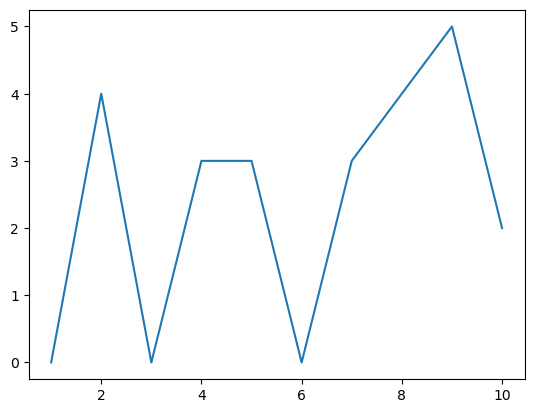

In [43]:
# Below, we will use matplotlib, so we need to import it here.
import matplotlib.pyplot as plt

x=[1,2,3,4,5,6,7,8,9,10]
y=[0,4,0,3,3,0,3,4,5,2]

plt.plot(x,y)

To start with, there are a few simple things you can do to improve your plot:

Text(0, 0.5, 'y (unit 2)')

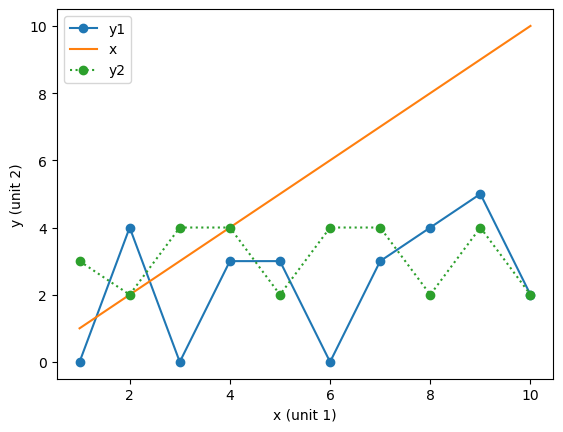

In [50]:
# Below, we will use matplotlib, so we need to import it here.

x=[1,2,3,4,5,6,7,8,9,10]
y1=[0,4,0,3,3,0,3,4,5,2]
plt.plot(x, y1, "o-", label="y1")
plt.plot(x, x, label="x")
y2=[3,2,4,4,2,4,4,2,4,2]
plt.plot(x, y2, "o:", label="y2")
plt.legend()
plt.xlabel('x (unit 1)')
plt.ylabel('y (unit 2)')

# Example: compute the Fibonacci sequence using *recursion*

1, 1, 2, 3, 5, 8, 13

In [51]:
def fib(n):
    """Return the Fibonacci sequence up to position n.
    
    n is an integer"""
    # Check that our assumptions are true
    assert type(n)==int
    assert n>0
    
    # special cases for short lists
    if n == 1:
        return [1]
    if n == 2:
        return [1,1]
    
    seq = fib(n-1)
    a = seq[-2]
    b = seq[-1]
    seq.append( a+b )
    return seq

fib(3)

[1, 1, 2]

In [52]:
fib(4)

[1, 1, 2, 3]

In [53]:
fib(10)

[1, 1, 2, 3, 5, 8, 13, 21, 34, 55]

## More strings

[`str`](https://docs.python.org/3/library/stdtypes.html#text-sequence-type-str)

Useful function for strings:

- `len`

Useful methods:

- `strip`
- `split`
- `startswith`
- `endswith`

In [54]:
len("my string")

9

In [55]:
"   my string    ".strip()

'my string'

In [56]:
len("   my string    ")

16

In [57]:
len("   my string    ".strip())

9

In [58]:
a="   my string    "
a.strip()

'my string'

In [59]:
a

'   my string    '

In [60]:
"a,b,c,def".split(",")

['a', 'b', 'c', 'def']

In [61]:
"hello world".startswith("hello")

True

In [62]:
"hello world".endswith("world")

True

## Dictionaries - Python's `dict` type

`dict` construction is with either `{}` or `dict()`.

In [63]:
x = {'key1': 'value1',
     'key2': 'value2',
    'key3': 'value3',
    }

In [64]:
x

{'key1': 'value1', 'key2': 'value2', 'key3': 'value3'}

In [65]:
x['key1']

'value1'

In [66]:
key = "key3"

In [67]:
x[key]

'value3'

In [68]:
x[key1]

NameError: name 'key1' is not defined

In [69]:
x = dict(   (('key1', 'value1'), ['key2', 'value2'], ('key3', 'value3'))    )

In [70]:
x

{'key1': 'value1', 'key2': 'value2', 'key3': 'value3'}

In [71]:
type(x)

dict

Keys in a `dict` can be any value that is *hashable*.

In [72]:
x={1:'value1', 2:'value2'}

In [73]:
x[1]

'value1'

In [74]:
x={(1,2,3): "456"}
x

{(1, 2, 3): '456'}

In [75]:
x[(1,2,3)]

'456'

In [76]:
x={[1,2,3]: "456"}
x

TypeError: unhashable type: 'list'

In [77]:
x = {'key1':1, 'key2':2, 'key3':123456, 'key4': [1,2,3], 'key5': {}, 1234: 4321, (1,2,3): '9845712345'}

In [78]:
x

{'key1': 1,
 'key2': 2,
 'key3': 123456,
 'key4': [1, 2, 3],
 'key5': {},
 1234: 4321,
 (1, 2, 3): '9845712345'}

Just like we can iterate over items in a list, we can iterate over the keys in a dict:

In [79]:
for key in x:
    print(key)

key1
key2
key3
key4
key5
1234
(1, 2, 3)


In [80]:
for key in x:
    value = x[key]
    print(f"key: {key}, value: {value}")

key: key1, value: 1
key: key2, value: 2
key: key3, value: 123456
key: key4, value: [1, 2, 3]
key: key5, value: {}
key: 1234, value: 4321
key: (1, 2, 3), value: 9845712345


In [81]:
x['key5']

{}

In [82]:
x['key does not exist']

KeyError: 'key does not exist'

In [83]:
x['my new key'] = 9843059

In [84]:
x

{'key1': 1,
 'key2': 2,
 'key3': 123456,
 'key4': [1, 2, 3],
 'key5': {},
 1234: 4321,
 (1, 2, 3): '9845712345',
 'my new key': 9843059}

In [85]:
x['key5']['hello'] = 'world'

In [86]:
x

{'key1': 1,
 'key2': 2,
 'key3': 123456,
 'key4': [1, 2, 3],
 'key5': {'hello': 'world'},
 1234: 4321,
 (1, 2, 3): '9845712345',
 'my new key': 9843059}

In [88]:
tmp = x['key5']
tmp['hello'] = 'world 2'

In [89]:
x

{'key1': 1,
 'key2': 2,
 'key3': 123456,
 'key4': [1, 2, 3],
 'key5': {'hello': 'world 2'},
 1234: 4321,
 (1, 2, 3): '9845712345',
 'my new key': 9843059}

In [90]:
x['key4'].append( 4 )

In [91]:
x

{'key1': 1,
 'key2': 2,
 'key3': 123456,
 'key4': [1, 2, 3, 4],
 'key5': {'hello': 'world 2'},
 1234: 4321,
 (1, 2, 3): '9845712345',
 'my new key': 9843059}

In [92]:
'key1' in x

True

In [93]:
1 in x

False

In [94]:
1234 in x

True

## More about functions: keyword arguments

In [95]:
def my_function(x, z=1):
    return x+z*z

In [96]:
my_function(9)

10

In [97]:
my_function(9,11)

130

In [98]:
my_function(9,z=11)

130

In [99]:
my_function(x=9,z=11)

130

In [100]:
my_function(z=11)

TypeError: my_function() missing 1 required positional argument: 'x'

In [101]:
my_function(z=11,x=9)

130

In [102]:
my_function(z=11,9)

SyntaxError: positional argument follows keyword argument (690924689.py, line 1)

In [103]:
def my_function2(x, y, z=1, qq=0):
    return x+z+qq+y

In [104]:
my_function2(0,1)

2

In [105]:
my_function2(0,1,qq=-32)

-30

## The `+` operator on various data types

In [106]:
1+1

2

In [107]:
1 + 2.3

3.3

In [108]:
"1"+1

TypeError: can only concatenate str (not "int") to str

In [109]:
1+"1"

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [110]:
"1"+"1"

'11'

In [111]:
"1   x" + "1   y"

'1   x1   y'

In [112]:
[1]+1

TypeError: can only concatenate list (not "int") to list

In [113]:
[1] + [1]

[1, 1]

In [114]:
x=[1]
y=[1]
z=x+y
z

[1, 1]

In [115]:
list.__add__([1], [1])

[1, 1]

In [116]:
x=[1]
x.append(1)
x

[1, 1]

In [117]:
int.__add__(1, 3)

4

In [118]:
1 + 3

4

Note: "joining" or "combining" one sequence to another is called *concatenating* the sequences. It works with lists of any length:

In [119]:
[1,2,3] + [4,5,6]

[1, 2, 3, 4, 5, 6]

In [120]:
[1,2,3] + []

[1, 2, 3]

In [121]:
[] + [1,2,3]

[1, 2, 3]

In [122]:
(1,) + (1,)

(1, 1)

In [123]:
(1,) + 1

TypeError: can only concatenate tuple (not "int") to tuple

## The `*` operator on various data types

In [124]:
1*5

5

In [125]:
"1xz"*5

'1xz1xz1xz1xz1xz'

In [126]:
"1xz"*"blah"

TypeError: can't multiply sequence by non-int of type 'str'

In [127]:
[1,2,3]*5

[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]

In [128]:
5 * [1,2,3]

[1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3, 1, 2, 3]

## Special method: `object.__add__(other)`

Many of the bits of Python we have already been using are defined as "special methods". The names of these methods start and end with a double underscore `__`. They are not usually called directly, but rather Python calls these methods "secretly" to acheive some task. As we saw above, the "add" special method is implemended with `__add__`:

In [129]:
six = 6
six.__add__(4)

10

In [130]:
int.__add__(6,4)

10

In [131]:
six+4

10

## Special method: `object.__getitem__(index)`

The special method `object.__getitem__(index)` is how python implements `object[index]`.

In [132]:
x={0:1}

In [133]:
x

{0: 1}

In [134]:
x[0]

1

In [135]:
x.__getitem__(0)

1

In [136]:
x={1:"value1",2:43}

In [137]:
x[1]

'value1'

In [138]:
x.__getitem__(1)

'value1'

## Special method: `sequence.__len__()`

Another special method is `__len__`, which returns the length of a sequence.

In [139]:
x

{1: 'value1', 2: 43}

In [140]:
len(x)

2

In [141]:
x.__len__()

2

## Special methods: `object.__str__()` (and `object.__repr__()`)

Another special method is `__str__`, which returns a string representation of the object. (`__repr__` does something very similar but can often be used to "reproduce" the original thing and is hence a little more exact if less "nice" or "pretty".)

In [142]:
str(0.4)

'0.4'

In [143]:
x = 0.4
x.__str__()

'0.4'

In [144]:
x={1:"value1",2:43}
x.__str__()

"{1: 'value1', 2: 43}"

In [145]:
print(x)

{1: 'value1', 2: 43}


In [146]:
print("hello")

hello


In [147]:
"hello"

'hello'

In [148]:
f"my value is: {x}"

"my value is: {1: 'value1', 2: 43}"

In [149]:
one = 1
one.__str__()

'1'

In [150]:
f"my value is: {1}"

'my value is: 1'

In [156]:
repr(0.1 + 0.2)

'0.30000000000000004'

In [158]:
0.1 + 0.2

0.30000000000000004

In [159]:
x.__repr__()

"{1: 'value1', 2: 43}"

In [160]:
"hello".__repr__()

"'hello'"

In [161]:
"hello".__str__()

'hello'

In [162]:
print("hello".__str__())

hello


In [163]:
print("hello".__repr__())

'hello'


In [164]:
print.__str__()

'<built-in function print>'

# Abstract *interfaces* in python

`for` loops iterate over "iterables". You can construct a `list` (or a `dict`) from iterables.

Functions and methods are "callable".

Getting items with square brackets (e.g. `x[0]`) works by calling the `__getitem__` method (so, `x.__getitem__(0)`). Any type can define how this works for that type.

## More on iterators

There are a couple of very handy functions which take an iterable and return a new iterator:

- `enumerate(items)` - returns iterator with index of items. Each iteration produces a tuple with `(index, item)`.
- `zip(a_items, b_items)` - returns iterator combining two other iterators. Each iteration produces a tuple with `(a_item, b_item)`

In [165]:
my_list = ['abc', 'def', 'ghi']
my_iterator = enumerate(my_list)
for x in my_iterator:
    idx, item = x
    print(f"{idx}: {item}")

0: abc
1: def
2: ghi


Usually, the temporary iterator would be implicit:

In [166]:
my_list = ['abc', 'def', 'ghi']
for x in enumerate(my_list):
    idx, item = x
    print(f"{idx}: {item}")

0: abc
1: def
2: ghi


We can directly assign the tuple to two variables for further elimination of temporary variables:

In [167]:
my_list = ['abc', 'def', 'ghi']
for idx, item in enumerate(my_list):
    print(f"{idx}: {item}")

0: abc
1: def
2: ghi


Now, for `zip`:

In [168]:
my_list = ['abc', 'def', 'ghi']
list2 = ['red', 'green', 'blue']
my_iterator = zip(my_list, list2)
for x in my_iterator:
    (item, color) = x
    print(f"{item} {color}")

abc red
def green
ghi blue


In [169]:
my_list = ['abc', 'def', 'ghi']
for (item, color) in zip(my_list, ['red', 'green', 'blue']):
    print(f"{item} {color}")

abc red
def green
ghi blue


In [170]:
my_list = ['abc', 'def', 'ghi']
for item, number in zip(my_list, range(3,6)):
    print(f"{item} {number}")

abc 3
def 4
ghi 5


# Data Frames

We are going to look at data in *tables* where each *row* of the table contains measurements or values about a single thing and each *column* is the measurement type. Such tables are very common in data science.

(Loading the iris data is hidden in this cell. You can ignore this.)
<!--
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df= pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                 columns= iris['feature_names'] + ['target'])
df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)
df = df.drop('target',axis=1)
def to_dict(df):
    result = {}
    for column_name in df.columns:
        result[column_name] = []
    for i,row in df.iterrows():
        for column_name in df.columns:
            result[column_name].append( row[column_name] )
    return result
iris_dict = to_dict(df)
print(iris_dict)
-->

Here is an example of the data we will be looking at. It is a subsampling of the very famous [Iris data set](https://en.wikipedia.org/wiki/Iris_flower_data_set).

<table class="dataframe" border="1">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>sepal length (cm)</th>
      <th>sepal width (cm)</th>
      <th>petal length (cm)</th>
      <th>petal width (cm)</th>
      <th>species</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>11</th>
      <td>4.8</td>
      <td>3.4</td>
      <td>1.6</td>
      <td>0.2</td>
      <td>setosa</td>
    </tr>
    <tr>
      <th>81</th>
      <td>5.5</td>
      <td>2.4</td>
      <td>3.7</td>
      <td>1.0</td>
      <td>versicolor</td>
    </tr>
    <tr>
      <th>97</th>
      <td>6.2</td>
      <td>2.9</td>
      <td>4.3</td>
      <td>1.3</td>
      <td>versicolor</td>
    </tr>
    <tr>
      <th>37</th>
      <td>4.9</td>
      <td>3.6</td>
      <td>1.4</td>
      <td>0.1</td>
      <td>setosa</td>
    </tr>
    <tr>
      <th>31</th>
      <td>5.4</td>
      <td>3.4</td>
      <td>1.5</td>
      <td>0.4</td>
      <td>setosa</td>
    </tr>
    <tr>
      <th>28</th>
      <td>5.2</td>
      <td>3.4</td>
      <td>1.4</td>
      <td>0.2</td>
      <td>setosa</td>
    </tr>
    <tr>
      <th>141</th>
      <td>6.9</td>
      <td>3.1</td>
      <td>5.1</td>
      <td>2.3</td>
      <td>virginica</td>
    </tr>
    <tr>
      <th>149</th>
      <td>5.9</td>
      <td>3.0</td>
      <td>5.1</td>
      <td>1.8</td>
      <td>virginica</td>
    </tr>
  </tbody>
</table>

For now, the data are given as a `dict`. This `dict` is created in a special way, where each key is the column name and each value is a list of the entry for each row for that column. Later we will read this from a file.

In [172]:
iris_dataset = {'sepal length (cm)': [5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4.8, 
                                      4.8, 4.3, 5.8, 5.7, 5.4, 5.1, 5.7, 5.1, 5.4, 5.1, 4.6, 5.1, 
                                      4.8, 5.0, 5.0, 5.2, 5.2, 4.7, 4.8, 5.4, 5.2, 5.5, 4.9, 5.0,
                                      5.5, 4.9, 4.4, 5.1, 5.0, 4.5, 4.4, 5.0, 5.1, 4.8, 5.1, 4.6,
                                      5.3, 5.0, 7.0, 6.4, 6.9, 5.5, 6.5, 5.7, 6.3, 4.9, 6.6, 5.2,
                                      5.0, 5.9, 6.0, 6.1, 5.6, 6.7, 5.6, 5.8, 6.2, 5.6, 5.9, 6.1,
                                      6.3, 6.1, 6.4, 6.6, 6.8, 6.7, 6.0, 5.7, 5.5, 5.5, 5.8, 6.0,
                                      5.4, 6.0, 6.7, 6.3, 5.6, 5.5, 5.5, 6.1, 5.8, 5.0, 5.6, 5.7, 
                                      5.7, 6.2, 5.1, 5.7, 6.3, 5.8, 7.1, 6.3, 6.5, 7.6, 4.9, 7.3, 6.7, 
                                      7.2, 6.5, 6.4, 6.8, 5.7, 5.8, 6.4, 6.5, 7.7, 7.7, 6.0, 6.9, 5.6, 7.7, 6.3, 6.7, 
                                      7.2, 6.2, 6.1, 6.4, 7.2, 7.4, 7.9, 6.4, 6.3, 6.1, 7.7, 6.3, 6.4, 6.0, 6.9, 6.7, 
                                      6.9, 5.8, 6.8, 6.7, 6.7, 6.3, 6.5, 6.2, 5.9], 
                'sepal width (cm)': [3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.4, 3.0, 3.0, 4.0, 4.4, 3.9, 3.5, 3.8, 3.8, 3.4, 3.7, 3.6, 3.3, 3.4, 3.0, 3.4, 3.5, 3.4, 3.2, 3.1, 3.4, 4.1, 4.2, 3.1, 3.2, 3.5, 3.6, 3.0, 3.4, 3.5, 2.3, 3.2, 3.5, 3.8, 3.0, 3.8, 3.2, 3.7, 3.3, 3.2, 3.2, 3.1, 2.3, 2.8, 2.8, 3.3, 2.4, 2.9, 2.7, 2.0, 3.0, 2.2, 2.9, 2.9, 3.1, 3.0, 2.7, 2.2, 2.5, 3.2, 2.8, 2.5, 2.8, 2.9, 3.0, 2.8, 3.0, 2.9, 2.6, 2.4, 2.4, 2.7, 2.7, 3.0, 3.4, 3.1, 2.3, 3.0, 2.5, 2.6, 3.0, 2.6, 2.3, 2.7, 3.0, 2.9, 2.9, 2.5, 2.8, 3.3, 2.7, 3.0, 2.9, 3.0, 3.0, 2.5, 2.9, 2.5, 3.6, 3.2, 2.7, 3.0, 2.5, 2.8, 3.2, 3.0, 3.8, 2.6, 2.2, 3.2, 2.8, 2.8, 2.7, 3.3, 3.2, 2.8, 3.0, 2.8, 3.0, 2.8, 3.8, 2.8, 2.8, 2.6, 3.0, 3.4, 3.1, 3.0, 3.1, 3.1, 3.1, 2.7, 3.2, 3.3, 3.0, 2.5, 3.0, 3.4, 3.0], 'petal length (cm)': [1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.6, 1.4, 1.1, 1.2, 1.5, 1.3, 1.4, 1.7, 1.5, 1.7, 1.5, 1.0, 1.7, 1.9, 1.6, 1.6, 1.5, 1.4, 1.6, 1.6, 1.5, 1.5, 1.4, 1.5, 1.2, 1.3, 1.4, 1.3, 1.5, 1.3, 1.3, 1.3, 1.6, 1.9, 1.4, 1.6, 1.4, 1.5, 1.4, 4.7, 4.5, 4.9, 4.0, 4.6, 4.5, 4.7, 3.3, 4.6, 3.9, 3.5, 4.2, 4.0, 4.7, 3.6, 4.4, 4.5, 4.1, 4.5, 3.9, 4.8, 4.0, 4.9, 4.7, 4.3, 4.4, 4.8, 5.0, 4.5, 3.5, 3.8, 3.7, 3.9, 5.1, 4.5, 4.5, 4.7, 4.4, 4.1, 4.0, 4.4, 4.6, 4.0, 3.3, 4.2, 4.2, 4.2, 4.3, 3.0, 4.1, 6.0, 5.1, 5.9, 5.6, 5.8, 6.6, 4.5, 6.3, 5.8, 6.1, 5.1, 5.3, 5.5, 5.0, 5.1, 5.3, 5.5, 6.7, 6.9, 5.0, 5.7, 4.9, 6.7, 4.9, 5.7, 6.0, 4.8, 4.9, 5.6, 5.8, 6.1, 6.4, 5.6, 5.1, 5.6, 6.1, 5.6, 5.5, 4.8, 5.4, 5.6, 5.1, 5.1, 5.9, 5.7, 5.2, 5.0, 5.2, 5.4, 5.1], 'petal width (cm)': [0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.2, 0.1, 0.1, 0.2, 0.4, 0.4, 0.3, 0.3, 0.3, 0.2, 0.4, 0.2, 0.5, 0.2, 0.2, 0.4, 0.2, 0.2, 0.2, 0.2, 0.4, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.2, 0.2, 0.3, 0.3, 0.2, 0.6, 0.4, 0.3, 0.2, 0.2, 0.2, 0.2, 1.4, 1.5, 1.5, 1.3, 1.5, 1.3, 1.6, 1.0, 1.3, 1.4, 1.0, 1.5, 1.0, 1.4, 1.3, 1.4, 1.5, 1.0, 1.5, 1.1, 1.8, 1.3, 1.5, 1.2, 1.3, 1.4, 1.4, 1.7, 1.5, 1.0, 1.1, 1.0, 1.2, 1.6, 1.5, 1.6, 1.5, 1.3, 1.3, 1.3, 1.2, 1.4, 1.2, 1.0, 1.3, 1.2, 1.3, 1.3, 1.1, 1.3, 2.5, 1.9, 2.1, 1.8, 2.2, 2.1, 1.7, 1.8, 1.8, 2.5, 2.0, 1.9, 2.1, 2.0, 2.4, 2.3, 1.8, 2.2, 2.3, 1.5, 2.3, 2.0, 2.0, 1.8, 2.1, 1.8, 1.8, 1.8, 2.1, 1.6, 1.9, 2.0, 2.2, 1.5, 1.4, 2.3, 2.4, 1.8, 1.8, 2.1, 2.4, 2.3, 1.9, 2.3, 2.5, 2.3, 1.9, 2.0, 2.3, 1.8], 'species': ['setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'setosa', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'versicolor', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica', 'virginica']}

Text(0, 0.5, 'petal width (cm)')

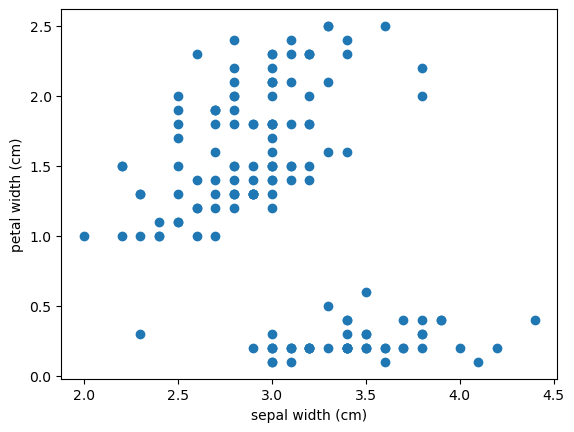

In [173]:
plt.plot(iris_dataset['sepal width (cm)'], iris_dataset['petal width (cm)'], 'o');
plt.xlabel('sepal width (cm)')
plt.ylabel('petal width (cm)')

In [174]:
for column_name in iris_dataset:
    print(column_name)

sepal length (cm)
sepal width (cm)
petal length (cm)
petal width (cm)
species


Let's double check that every column (the value of each key) has the same number of rows.

In [175]:
for column_name in iris_dataset:
    column = iris_dataset[column_name]
    print("'{}': {} rows".format(column_name, len(column)))

'sepal length (cm)': 150 rows
'sepal width (cm)': 150 rows
'petal length (cm)': 150 rows
'petal width (cm)': 150 rows
'species': 150 rows
